<a href="https://colab.research.google.com/github/vadim-vic/Signal-separation/blob/main/96_Example_ComplexVectorProjection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Operations with complex vectors sometimes visually differ from expected with real-valued ones
# A version of self-modeling regression is included

In [ ]:
import numpy as np

# ** Semor, two-pametric (scale, shift) self-modeling regression
def find_gradient_shift(x, y, N, is_proj = False):
  # Find the best phase of y to minimize the distance to x
  # N is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors

  if np.all(y == 0):
    return y # raise ValueError('..') Raise it somwhere else, here you just return y

  min_dist = float('inf')
  best_shift = 0

  # The shifting runs two times, put it to a function
  def shift_it(y, len_x, shift):
    if shift < 0:
      shifted_y = np.pad(y[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_y = np.pad(y[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_y
  #--- end subfunction
  # Put proj_xy subfunction here to resuce complexity
  def proj_xy(x, y, is_proj):
    if is_proj:
      z = np.vdot(x,y) / np.dot(y, y) * y
      return z # (np.dot(x,y) / np.dot(y, y)) * y  # Check denominator above
    else:
      return y
  #--- end subfunction
  # Norm of the esidue between x and y
  def dist_xy(x, y, is_proj):
    return np.linalg.norm(x - proj_xy(x, y, is_proj))
  #--- end subfunction
  len_x = len(x)

  # Determine direction of decent
  curr_dist = dist_xy(x, y, is_proj)
  left_dist = dist_xy(x, shift_it(y, len_x, -1), is_proj)
  righ_dist = dist_xy(x, shift_it(y, len_x, +1), is_proj)

  if left_dist < curr_dist:
    shift_dir = -1
    min_dist = left_dist # Keep for the next descent
  elif righ_dist < curr_dist:
    shift_dir = +1
    min_dist = righ_dist
  else:
    return proj_xy(x, y, is_proj) # No shift

  # In the case of N == 1
  if N == 1:
    return proj_xy(x, shift_it(y, len_x, shift_dir), is_proj)

  # Descent until N ends or min finds
  for shift in range(2, N + 1):
    shifted_y = shift_it(y, len_x, shift * shift_dir)
    curr_dist = dist_xy(x, shifted_y, is_proj) # Currest distance
    print(shift, curr_dist, min_dist)
    if curr_dist < min_dist:
      min_dist = curr_dist # Continue
      # best_shift = shift
    else:
      break
  return proj_xy(x, shifted_y, is_proj) # In case of the cycle reaches its end

2 14.786305365462566 17.35939914168276
3 11.878335295761685 14.786305365462566
4 9.536889302979931 11.878335295761685
5 8.523281161614946 9.536889302979931
6 9.741088846905443 8.523281161614946


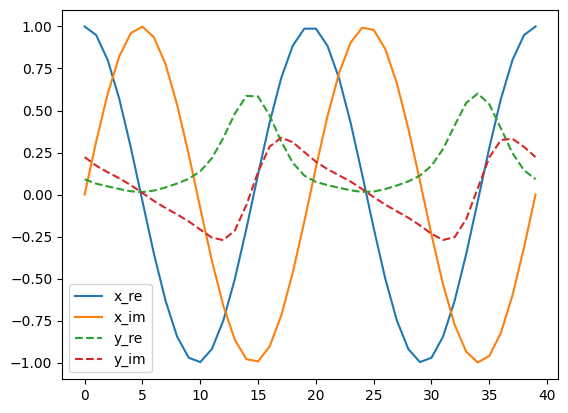

In [ ]:
import matplotlib.pyplot as plt

_ = np.linspace(0, 4 * np.pi, 40)  # 10 points from 0 to 4π
cos_vector = np.cos(_)  # Cosine values for 2 cycles
sin_vector = np.sin(_)  # Sine values for 2 cycles

x = cos_vector + 1j * sin_vector  # Complex numbers
y = 0.2 * np.cos(x + 0.1) + 0.25 * 1j * np.sin(x + 0.1)  # Complex numbers
z = ((np.vdot(x,y) / np.vdot(y, y)) * y)
z = find_gradient_shift(x, y, 7, True)

plt.plot(x.real, label='x_re')
plt.plot(x.imag, label='x_im')
plt.plot(y.real, label='y_re', linestyle='--')
plt.plot(y.imag, label='y_im', linestyle='--')
plt.legend()
plt.show()